<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/17.%20Introduction%20to%20Machine%20Learning/Learn%20-%20Introduction%20to%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Contents**
- [Importing Libraries](#Importing-Libraries)
- [Reading Dataset](#Reading-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Logistic Regression Model](#Logistic-Regression-Model)
- [Conclusion](#Conclusion)

**Dataset**
- `diabetes.csv` from [Kaggle](https://www.kaggle.com/mathchi/diabetes-data-set)

**Objective**
- Predict whether a person had diabetes or not using simple logistic regression

**Notes**
- Since it's only an introduction to machine learning, I won't do any data preprocessing


# Importing Libraries

In [18]:
!pip install inflection

In [107]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case format
import inflection

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading Dataset

In [17]:
path = '/content/drive/MyDrive/Digital Skola/dataset/kaggle_diabetes.csv'

data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

## Dataset Overview

In [20]:
data.duplicated().sum()

0

I will rename the columns to camel case format.

In [22]:
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(col)

data.columns = column_list

data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
data.iloc[:,:-1].describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [28]:
data.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

## Data Distribution

### Target Distribution

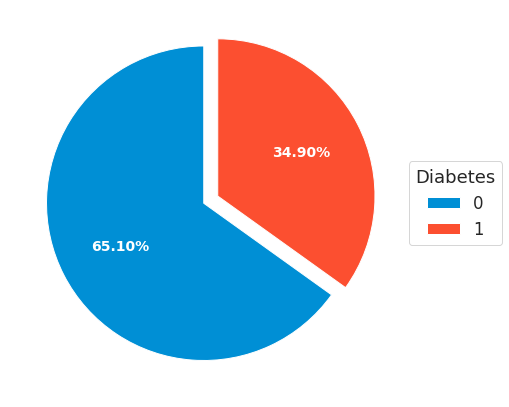

In [71]:
pie_data = data['outcome'].value_counts(normalize=True).values * 100
pie_label = data['outcome'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Diabetes',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

This dataset is imbalance. But, I will leave it as it is.

### Box Plot

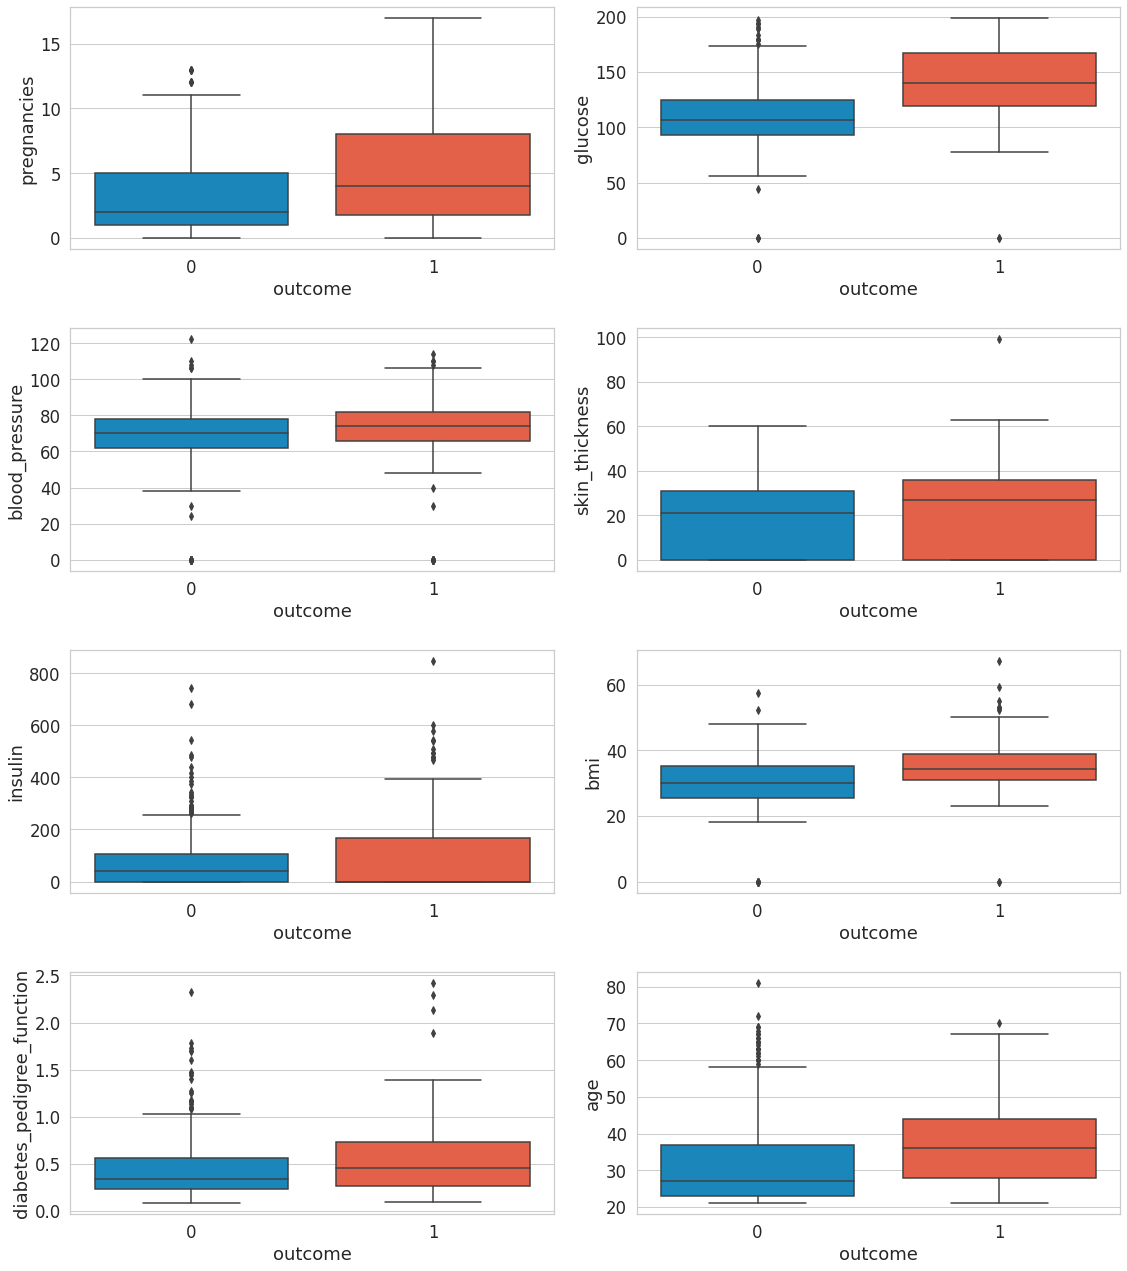

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list[:-1]):
  sns.boxplot(data=data, x='outcome', y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

### Scatter Plot

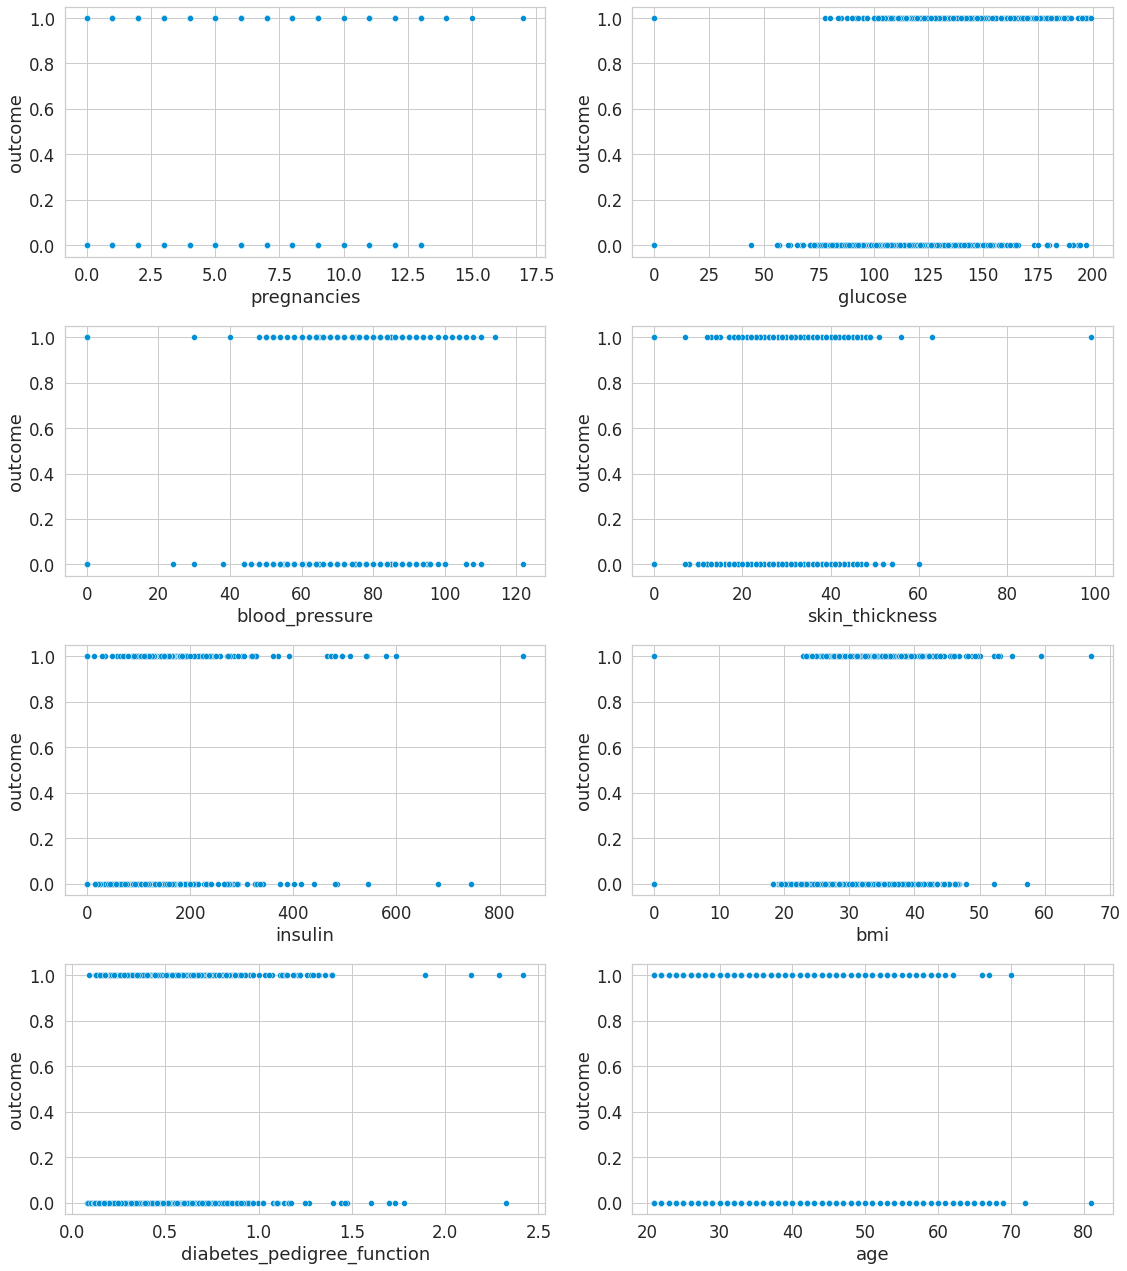

In [49]:
fig, ax = plt.subplots(4, 2, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list[:-1]):
  sns.scatterplot(data=data, x=col, y='outcome', ax=axes_list[i])

plt.tight_layout()
plt.show()

### Density Plot

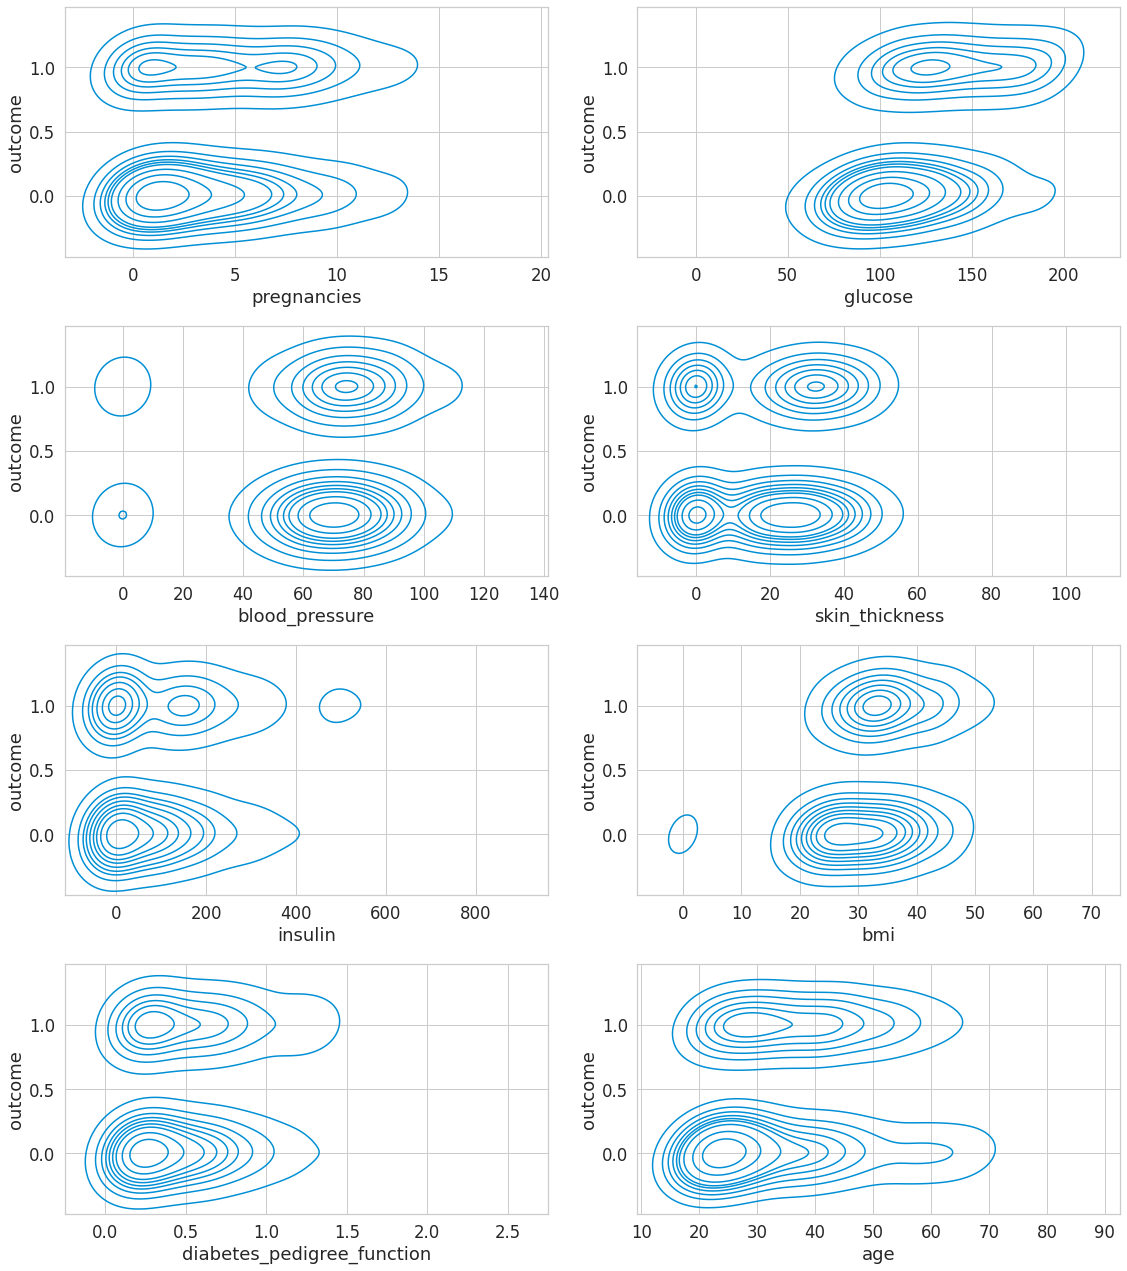

In [50]:
fig, ax = plt.subplots(4, 2, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list[:-1]):
  sns.kdeplot(data=data, x=col, y='outcome', ax=axes_list[i])

plt.tight_layout()
plt.show()

### Correlation

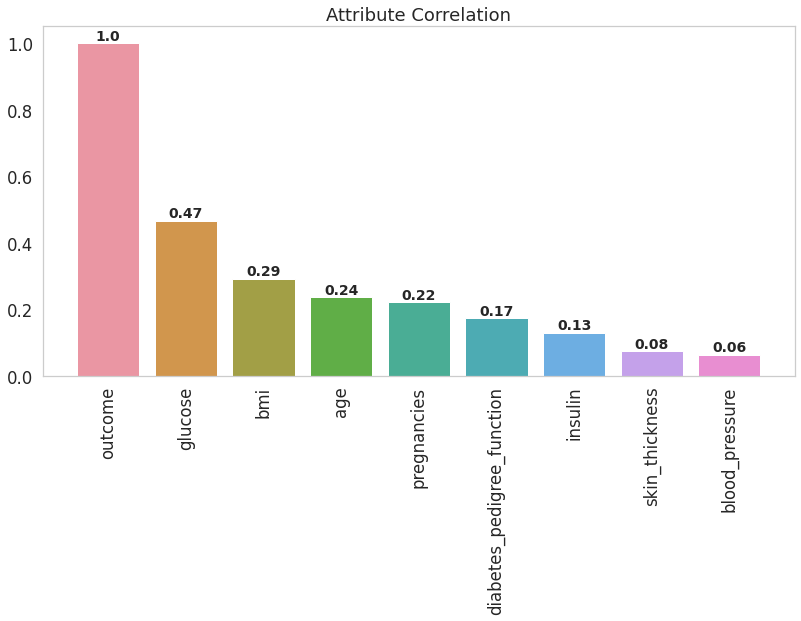

In [76]:
corr_matrix = data.corr().round(3)
corr_target = corr_matrix['outcome'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation')

plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
  if corr_target[n] >= 0:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
  else:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')    

plt.show()

# Logistic Regression Model
For this project, I will only use a single attribute from the dataset.
<br><br>
Based From the EDA above, I think the `glucose` attribute is quite good for a simple logistic regression model.

## Splitting Data

In [57]:
X = data[['glucose']].astype(float)
y = data['outcome'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Development & Training

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Making Prediction

In [59]:
y_pred = model.predict(X_test)

## Model Evaluation

### Classification Report

In [60]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.764     0.911     0.831       146
         1.0      0.772     0.518     0.620        85

    accuracy                          0.766       231
   macro avg      0.768     0.714     0.725       231
weighted avg      0.767     0.766     0.753       231



In [61]:
print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
print('Precision\t: ', round(precision_score(y_test, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test, y_pred, average='macro'),3))

Accuracy	:  0.766
Precision	:  0.768
Recall		:  0.714


### Confusion Matrix

In [65]:
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Diabetes', 1:'Diabetes'}, index={0:'Not Diabetes', 1:'Diabetes'}, inplace=True)
df_cm

,Not Diabetes,Diabetes
Not Diabetes,133,13
Diabetes,41,44


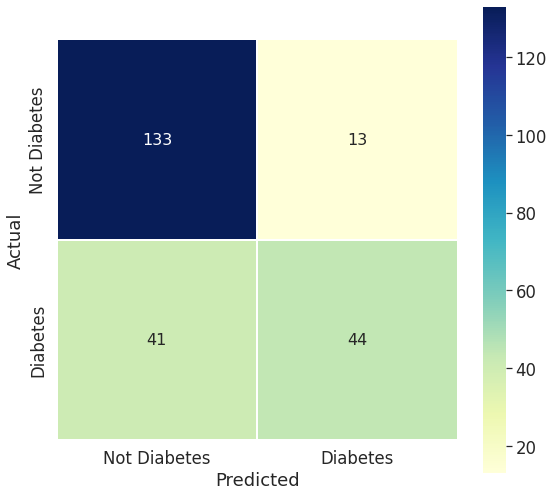

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

## Logistic Function Plot

In [92]:
coef = model.coef_
coef

array([[0.03692593]])

In [93]:
coef = coef.flatten()
coef

array([0.03692593])

In [73]:
intercept = model.intercept_
intercept

array([-5.27280134])

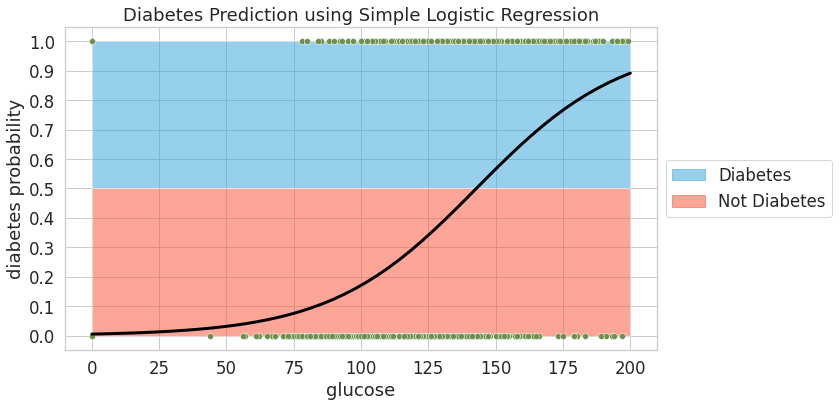

In [127]:
x = np.linspace(0, 200)

p = 1/(1 + np.exp(-(coef*x + intercept)))

fig, ax = plt.subplots(figsize=(12,6))

# ax.fill_between(x, p, [ax.get_ylim()[1]]*len(x), facecolor = '#30A2DA', alpha = 0.2)
# ax.fill_between(x, p, [ax.get_ylim()[0]]*len(x), facecolor = '#FC4F30', alpha = 0.2)

# fivethirtyeight colors
# blue    = #30A2DA
# red     = #FC4F30
# yellow  = #E5AE38
# green   = #6D904F
# grey    = #8B8B8B

alpha = 0.5
ax.fill_between(x=x, y1=0.5, y2=1, facecolor='#30A2DA', alpha=alpha)
ax.fill_between(x=x, y1=0, y2=0.5, facecolor='#FC4F30', alpha=alpha)
red_patch = mpatches.Patch(color='#30A2DA', alpha=alpha, label='Diabetes')
blue_patch = mpatches.Patch(color='#FC4F30', alpha=alpha, label='Not Diabetes')

sns.scatterplot(data=data, x='glucose', y='outcome', color='#6D904F', ax=ax)
sns.lineplot(x=x, y=p, linewidth=3, color='black', ax=ax)

ax.set_title('Diabetes Prediction using Simple Logistic Regression')
ax.set_yticks(np.linspace(0,1,11))
ax.set_ylabel('diabetes probability')

ax.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Conclusion
**Conclusion**
- Yes it can be used to predict whether a person had diabetes or not.
- The accuracy and precision are above 75%. But, it's still not a good model. Especially if we look at the recall value, it's only about 50%. It means, this model only can catch 50% of patients who had diabetes.
<br><br>

**Root of Problems**
- I'm not doing any data preprocessing method, such as scaling the data and balancing the target data
- I use a very simple logistic regression model
<br><br>

**Future Works**
- Do some data preprocessing methods
- Use a more complex model